<a href="https://colab.research.google.com/github/yeachanyun/AutoTradingSystem/blob/master/%EC%9C%A4%EC%98%88%EC%B0%AC/Getting_Stock_Data_CSVs_and_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import datetime
import pandas_datareader.data as web

import matplotlib.pyplot as plt

In [20]:
def get_stock_data_split_csv(
      symbols
    , start_date
    , end_date
    , test_size=0.2
    ):
    """
    Retrieves filtered stock dataframe using yahoo finance 
    and saves to train/test csv.

    - codes: List of the ticker symbols
      * example: ['000000.KS', '000000.KQ', 'ABCD']
      * KS = KOSPI, KQ = KOSDAQ
    - start_date, end_date: datetime range of stock data (yyyy-mm-dd)
    """
    for code in symbols:
        stock_df_orig = web.DataReader(
            '%s' % code
            , 'yahoo'
            , start_date
            , end_date
        )
        stock_df_filter = stock_df_orig[stock_df_orig['Volume'] != 0]

        X_train, X_test = train_test_split(
              stock_df_filter
            , test_size=test_size
            , random_state=0
        )
        X_train.to_csv('%s_train.csv'  % code)
        X_test.to_csv('%s_test.csv'  % code)

    return stock_df_filter

In [21]:
def show_mv_avg_chart(stock_df):
    """
    Shows Adj. Close and 5, 20, 60, 120 days of 
    moving average portfolios to single chart.

    - stock_df: Dataframe created from pandas_datareader
    """
    mv_avg_5 = stock_df['Adj Close'].rolling(window=5).mean()
    mv_avg_20 = stock_df['Adj Close'].rolling(window=20).mean()
    mv_avg_60 = stock_df['Adj Close'].rolling(window=60).mean()
    mv_avg_120 = stock_df['Adj Close'].rolling(window=120).mean()

    plt.figure(figsize=(20,10))

    plt.plot(stock_df.index, stock_df['Adj Close'], label='Adj Close')
    plt.plot(stock_df.index, mv_avg_5, label='MA5')
    plt.plot(stock_df.index, mv_avg_20, label='MA20')
    plt.plot(stock_df.index, mv_avg_60, label='MA60')
    plt.plot(stock_df.index, mv_avg_120, label='MA120')

    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [22]:
stock_df = get_stock_data_split_csv(['000020.KS'], '2010-01-01', '2020-01-01')
stock_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7820.0,7480.0,7540.0,7520.0,176987.0,6620.980957
2010-01-05,7580.0,7350.0,7490.0,7500.0,214214.0,6603.371582
2010-01-06,7500.0,7320.0,7500.0,7350.0,81868.0,6471.304688
2010-01-07,7420.0,7200.0,7350.0,7210.0,106385.0,6348.041992
2010-01-08,7330.0,7220.0,7220.0,7240.0,61023.0,6374.455566


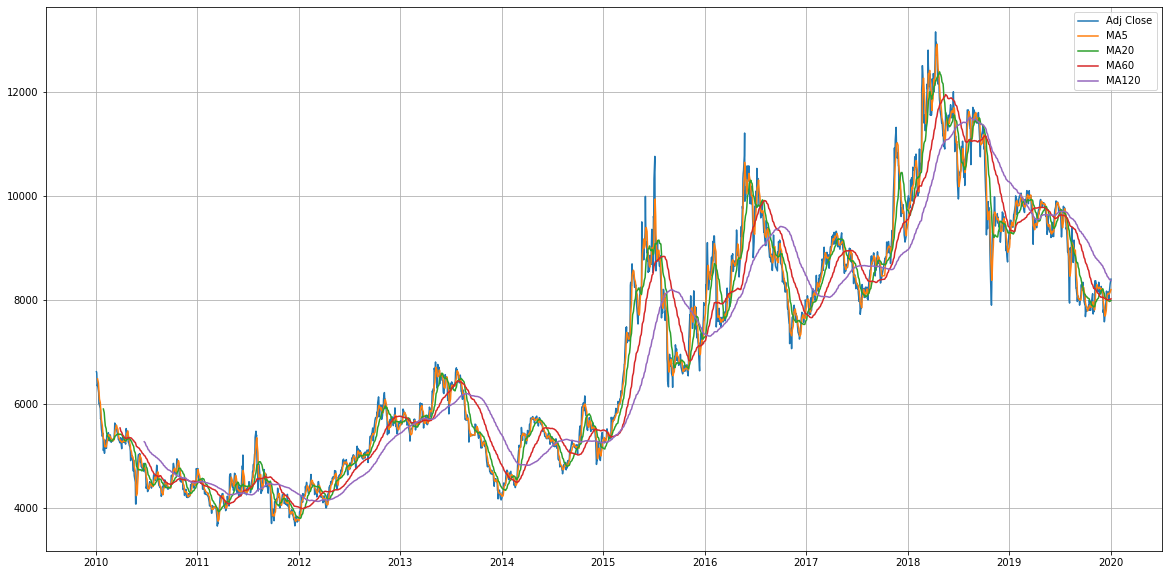

In [23]:
show_mv_avg_chart(stock_df)